# Importing libraries and Dataset


In [ ]:
import numpy as np
import pandas as pd

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving response8.csv to response8.csv


In [ ]:
response=pd.read_csv('response8.csv')

In [ ]:

response

,Email address,Name,Age,Gender,Job Sector,Location,Q1 - My appetite is poor,Q2- i cannot uplift my mood,Q3 - My self-confidence is low,Q4 - I have trouble concentrating on what I was doing,...,Q10 - loss of interest in usual activities,Q11 - I sleep much more than usual,Q12 - I feel like I am moving too slowly,Q13 - I feel fidgety,Q14 - I wish I was dead,Q15 - I want to hurt myself,Q16 - I do not like myself,Q17 - I loose a lot of weight without trying to,Q18 - I have a lot of trouble getting to sleep,Q19 - I could not focus on important things
0,aaravgandhi7@gmail.com,Aarav gandhi,Dec-18,Male,Student,Metrapolitan City,Almost never,Very rarely,Seldom,Very frequently,...,Very rarely,Very rarely,Seldom,Very rarely,Almost never,Almost never,Almost never,Very rarely,Almost never,Seldom
1,madhavdacha@gmail.com,Madhav Dacha,Dec-18,Male,Student,Metrapolitan City,Seldom,Seldom,Seldom,Seldom,...,Seldom,Seldom,Seldom,Seldom,Seldom,Seldom,Seldom,Very frequently,Seldom,Seldom
2,pranayjain.official@gmail.com,Pranay Jain,Dec-18,Male,Student,Metrapolitan City,Seldom,Seldom,Very rarely,Very frequently,...,Seldom,Seldom,Seldom,Seldom,Almost never,Almost never,Almost never,Almost never,Seldom,Seldom
3,shivaanshsahni2001@gmail.com,Shivaansh Sahni,19-24,Male,Student,Metrapolitan City,Very rarely,Seldom,Very rarely,Very frequently,...,Seldom,Very frequently,Almost never,Seldom,Almost never,Almost never,Almost never,Very rarely,Almost never,Very rarely
4,inneshm@gmail.com,Innesh Mahajan,Dec-18,Male,Student,Town,Very rarely,Very frequently,Seldom,Seldom,...,Almost never,Almost never,Seldom,Almost never,Almost never,Almost never,Almost never,Almost never,Almost never,Very rarely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,arjuunkuumar@gmail.com,Arjun,46-56,Male,Hospitality,Metrapolitan City,Seldom,Seldom,Seldom,Seldom,...,Seldom,Seldom,Very frequently,Seldom,Seldom,Almost never,Very rarely,Seldom,Seldom,Seldom
157,ajay.mathurr24@gmail.com,AJ,46-56,Male,Media and News,Metrapolitan City,Almost never,Seldom,Seldom,Very frequently,...,Seldom,Almost never,Seldom,Very frequently,Almost never,Almost never,Very rarely,Almost always,Almost always,Very frequently
158,samiyabhatia2695@gmail.com,Samiya,Dec-18,Female,Student,Metrapolitan City,Seldom,Very frequently,Very frequently,Seldom,...,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Almost never,Very frequently,Almost never,Very frequently,Very frequently
159,kushk2020@gmail.com,Kush Khatri,57-70,Male,Education,Metrapolitan City,Almost always,Almost always,Almost never,Almost never,...,Almost never,Very rarely,Almost never,Almost never,Very rarely,Almost never,Very rarely,Very rarely,Very frequently,Very rarely


In [ ]:
response["Age"] = response["Age"].replace(["Dec-18"] , ["12-18"])

In [ ]:
response

# Replacement with values


In [ ]:
response["Q1 - My appetite is poor"] = response["Q1 - My appetite is poor"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q2- i cannot uplift my mood "] = response["Q2- i cannot uplift my mood "].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q3 - My self-confidence is low "] = response["Q3 - My self-confidence is low "].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:

response["Q4 - I have trouble concentrating on what I was doing"] = response["Q4 - I have trouble concentrating on what I was doing"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q5 - I feel sad"] = response["Q5 - I feel sad"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q6 - My sleep is restless"] = response["Q6 - My sleep is restless"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q7 - I do not feel excited "] = response["Q7 - I do not feel excited "].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q8 - Nothing makes me happy"] = response["Q8 - Nothing makes me happy"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q9 - I feel like a bad person"] = response["Q9 - I feel like a bad person"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q10 - loss of interest in usual activities"] = response["Q10 - loss of interest in usual activities"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q11 - I sleep much more than usual"] = response["Q11 - I sleep much more than usual"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:

response["Q12 - I feel like I am moving too slowly  "] = response["Q12 - I feel like I am moving too slowly  "].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q13 - I feel fidgety"] = response["Q13 - I feel fidgety"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:

response["Q14 - I wish I was dead"] = response["Q14 - I wish I was dead"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q15 - I want to hurt myself"] = response["Q15 - I want to hurt myself"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q16 - I do not like myself"] = response["Q16 - I do not like myself"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q17 - I loose a lot of weight without trying to"] = response["Q17 - I loose a lot of weight without trying to"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:

response["Q18 - I have a lot of trouble getting to sleep"] = response["Q18 - I have a lot of trouble getting to sleep"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response["Q19 - I could not focus on important things"] = response["Q19 - I could not focus on important things"].replace(["Almost never", "Very rarely", "Seldom", "Very frequently","Almost always"] , [0,1,2,3,4])

In [ ]:
response

,Email address,Name,Age,Gender,Job Sector,Location,Q1 - My appetite is poor,Q2- i cannot uplift my mood,Q3 - My self-confidence is low,Q4 - I have trouble concentrating on what I was doing,...,Q10 - loss of interest in usual activities,Q11 - I sleep much more than usual,Q12 - I feel like I am moving too slowly,Q13 - I feel fidgety,Q14 - I wish I was dead,Q15 - I want to hurt myself,Q16 - I do not like myself,Q17 - I loose a lot of weight without trying to,Q18 - I have a lot of trouble getting to sleep,Q19 - I could not focus on important things
0,aaravgandhi7@gmail.com,Aarav gandhi,12-18,Male,Student,Metrapolitan City,0,1,2,3,...,1,1,2,1,0,0,0,1,0,2
1,madhavdacha@gmail.com,Madhav Dacha,12-18,Male,Student,Metrapolitan City,2,2,2,2,...,2,2,2,2,2,2,2,3,2,2
2,pranayjain.official@gmail.com,Pranay Jain,12-18,Male,Student,Metrapolitan City,2,2,1,3,...,2,2,2,2,0,0,0,0,2,2
3,shivaanshsahni2001@gmail.com,Shivaansh Sahni,19-24,Male,Student,Metrapolitan City,1,2,1,3,...,2,3,0,2,0,0,0,1,0,1
4,inneshm@gmail.com,Innesh Mahajan,12-18,Male,Student,Town,1,3,2,2,...,0,0,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,arjuunkuumar@gmail.com,Arjun,46-56,Male,Hospitality,Metrapolitan City,2,2,2,2,...,2,2,3,2,2,0,1,2,2,2
157,ajay.mathurr24@gmail.com,AJ,46-56,Male,Media and News,Metrapolitan City,0,2,2,3,...,2,0,2,3,0,0,1,4,4,3
158,samiyabhatia2695@gmail.com,Samiya,12-18,Female,Student,Metrapolitan City,2,3,3,2,...,3,3,3,3,3,0,3,0,3,3
159,kushk2020@gmail.com,Kush Khatri,57-70,Male,Education,Metrapolitan City,4,4,0,0,...,0,1,0,0,1,0,1,1,3,1


# Response

In [ ]:
def namaste(name):
  greetings="""
  Greetings!
  During the time of the pandemic, the country was forced to be put through a complete lockdown. Everything came to a standstill. The lockdown did have a positive impact in people’s lives where they got the opportunity to spend quality time with their family, on the other hand, several people suffered financial crises and there was a huge impact on their physical health. But most importantly, it adversely impacted several people’s mental well being.
  Project -
  The aim of our project is to normalize mental health, create awareness and make an easily accessible diagnostic platform for everyone anywhere. Our project provides a psychological score of a person’s mental health which will suggest if the person needs any professional help or not. We have asked basic questions about the feelings of a person. The person will be requested to enter a paragraph which will be judged on the basis of positivity and negativity .

  Results of """ + name
  return greetings

In [ ]:
def info(name, age, email, gender,job, location):
  name=str(name)
  age=str(age)
  email=str(email)
  gender=str(gender)
  city=str(location)
  location=str(location)
  personal_info="""
  Name: """+name+"""
  Age category: """+age+"""
  Email Id: """+email+"""
  Gender: """+gender+"""
  Job Sector: """+job+"""
  Location: """+city
  return personal_info

In [ ]:
def email_response(name, age, email, gender,job, location,sum,sadness,interest,appetite,sleep,thinking,guilt, tired, movement, suicide):
  final="""Greetings """+name+""",
  During the time of the pandemic, the country was forced to be put through a complete lockdown. Everything came to a standstill. The lockdown did have a positive impact on people’s lives where they got the opportunity to spend quality time with their family, on the other hand, several people suffered financial crises and there was a huge impact on their physical health. But most importantly, it adversely impacted several people’s mental well-being.

  Project -
  The aim of our project is to normalize mental health, create awareness and make an easily accessible diagnostic platform for everyone anywhere. Our project provides a psychological score of a person’s mental health which will suggest if the person needs any professional help or not. We have asked basic questions about the feelings of a person. The person will be requested to enter a paragraph which will be judged on the basis of positivity and negativity.

  Name: """+name+"""
  Age: """+age+"""
  email" """+email+"""
  Gender: """+gender+"""
  job sector: """+job+"""
  location: """+location+"""

  Your Scorers -"""+sum+"""

  Scores are presented as total raw scores as well. High scores indicate more symptoms of depression. Further interpretation of individual responses can be done in light of the symptoms clusters. Those clusters are:
  1 – Sadness (Dysphoria): Questions 2, 4, 6
        Your score="""+sadness+"""
  2 – Loss of Interest (Anhedonia): Questions 8, 10
        Your score="""+interest+"""
  3 – Appetite: Questions 1, 18
        Your score="""+appetite+"""
  4 – Sleep: Questions 5, 11, 19
        Your score="""+sleep+"""
  5 – Thinking / concentration: Questions 3, 20
        Your score="""+thinking+"""
  6 – Guilt (Worthlessness): Questions 9, 17
        Your score="""+guilt+"""
  7 – Tired (fatigue): Questions 7, 16
        Your score="""+tired+"""
  8 – Movement (Agitation): Questions 12, 13
        Your score="""+movement+"""
  9 – Suicidal ideation: Questions 14, 15
        Your score="""+suicide+"""

  According to the DSM-5 criteria, a diagnosis of Major Depressive disorder can be made if five (or more) of the above symptom clusters are endorsed and at least one of the symptoms is either (1) depressed mood or (2) loss of interest in pleasure.
  Given below are links for consultancy -
  Online Consulting -
  eTherapyPro— Best Overall
  7 Cups— Best for Peer Support
  Free Online Therapy— Best for a Free Assessment
  BlahTherapy— Best for Emotional Support
  TalkwithStranger!— Best for Anonymity
  Physical consultancy -
  https://www.google.com/search?q=psychologist+near+me&source=hp&ei=0rKcYvS1MLWUseMPnY-CuAY&iflsig=AJiK0e8AAAAAYpzA4il6wv1aqLkRXZkd-qfny8uMCORd&oq=psychologi&gs_lcp=Cgdnd3Mtd2l6EAMYATIICAAQgAQQsQMyDggAEIAEELEDEIMBEMkDMgUIABCSAzIFCAAQkgMyCwgAEIAEELEDEIMBMggIABCABBCxAzILCAAQgAQQsQMQgwEyBQgAEIAEMgUIABCABDIFCAAQgAQ6CwguELEDEIMBENQCOgQIABADOggILhCxAxCDAToICC4QgAQQsQM6CAgAELEDEIMBOgUIABCxA1AAWMUWYLUzaAFwAHgAgAG0AYgBgAuSAQQwLjExmAEAoAEB&sclient=gws-wiz&dlnr=1&sei=2rKcYvbFLMeNseMP2_ypgAQ
  Discord servers for ranting -
  1- Rant Away | Discord Me
  2- https://top.gg/servers/859601836008407090/join

  """
  return final

# New Section

In [ ]:
response=response.apply(pd.to_numeric,errors="ignore")

In [ ]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Email address                                          161 non-null    object 
 1   Name                                                   161 non-null    object 
 2   Age                                                    161 non-null    object 
 3   Gender                                                 161 non-null    object 
 4   Job Sector                                             161 non-null    object 
 5   Location                                               161 non-null    object 
 6   Q1 - My appetite is poor                               161 non-null    float64
 7   Q2- i cannot uplift my mood                            161 non-null    float64
 8   Q3 - My self-confidence is low                    

In [ ]:
arr1=[]
sadd=[]
intt=[]
app=[]
sleepy=[]
thinker=[]
guilty=[]
tiry=[]
movey=[]
suicidy=[]

In [ ]:
for i in range(0,len(response)):
  row=response.loc[i]
  q=row[6:27]
  sum=0
  sadness=0
  interest=0
  appetite=0
  sleep=0
  thinking=0
  guilt=0
  tired=0
  movement=0
  suicide=0
  c=0
  for j in q:
    if c==1 or c==3 or c==5:
      sadness=sadness+j
    if c==7 or c==9:
      interest=interest+j
    if c==0 or c==17:
      appetite=appetite+j
    if c==4 or c==10 or c==18:
      sleep=sleep+j
    if c==13 or c==14:
      suicide = suicide+ j
    if c==11 or c==12:
      movement=movement+j
    if c==6 or c==15:
      tired = tired +j
    if c==8 or c==16:
      guilt=guilt+j
    if c==2 or c==19:
      thinking= thinking+j
    c=c+1
  sum=sadness+interest+appetite+sleep+thinking+guilt+tired+movement+suicide
  sad=[sadness]
  sadd=sadd+sad
  inte=[interest]
  intt=intt+inte
  food=[appetite]
  app=app+food
  sl=[sleep]
  sleepy=sleepy+sl
  th=[thinking]
  thinker=thinker+th
  gl=[guilt]
  guilty=guilty+gl
  ti=[tired]
  tiry=tiry+ti
  mo=[movement]
  movey=movey+mo
  sui=[suicide]
  suicidy=suicidy+sui
  arr=[sum]
  arr1=arr1+arr

In [ ]:
response['Score']=arr1
response['sadness']=sadd
response['Loss of Interest']=intt
response['Appetite']=app
response['sleep']=sleepy
response['thinking']=thinker
response['guilt']=guilty
response['tiredness']=tiry
response['movement']=movey
response['suicide ideation']=suicidy

In [ ]:
response

,Email address,Name,Age,Gender,Job Sector,Location,Q1 - My appetite is poor,Q2- i cannot uplift my mood,Q3 - My self-confidence is low,Q4 - I have trouble concentrating on what I was doing,...,Score,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
0,aaravgandhi7@gmail.com,Aarav gandhi,12-18,Male,Student,Metrapolitan City,0,1,2,3,...,18,4,2,0,4,2,2,1,3,0
1,madhavdacha@gmail.com,Madhav Dacha,12-18,Male,Student,Metrapolitan City,2,2,2,2,...,36,6,2,4,6,2,5,3,4,4
2,pranayjain.official@gmail.com,Pranay Jain,12-18,Male,Student,Metrapolitan City,2,2,1,3,...,24,6,2,4,5,1,0,2,4,0
3,shivaanshsahni2001@gmail.com,Shivaansh Sahni,19-24,Male,Student,Metrapolitan City,1,2,1,3,...,22,8,3,1,6,1,1,0,2,0
4,inneshm@gmail.com,Innesh Mahajan,12-18,Male,Student,Town,1,3,2,2,...,15,6,0,1,3,2,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,arjuunkuumar@gmail.com,Arjun,46-56,Male,Hospitality,Metrapolitan City,2,2,2,2,...,36,6,4,4,6,2,4,3,5,2
157,ajay.mathurr24@gmail.com,AJ,46-56,Male,Media and News,Metrapolitan City,0,2,2,3,...,37,9,4,4,5,2,4,4,5,0
158,samiyabhatia2695@gmail.com,Samiya,12-18,Female,Student,Metrapolitan City,2,3,3,2,...,48,7,6,5,9,3,3,6,6,3
159,kushk2020@gmail.com,Kush Khatri,57-70,Male,Education,Metrapolitan City,4,4,0,0,...,25,7,2,7,3,0,2,3,0,1


# Correlation

In [ ]:
#Correlation

In [ ]:
# Import plotting libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

In [ ]:
response.columns

Index(['Email address', 'Name', 'Age', 'Gender ', 'Job Sector', 'Location',
       'Q1 - My appetite is poor', 'Q2- i cannot uplift my mood ',
       'Q3 - My self-confidence is low ',
       'Q4 - I have trouble concentrating on what I was doing',
       'Q5 - I feel sad', 'Q6 - My sleep is restless',
       'Q7 - I do not feel excited ', 'Q8 - Nothing makes me happy',
       'Q9 - I feel like a bad person',
       'Q10 - loss of interest in usual activities',
       'Q11 - I sleep much more than usual',
       'Q12 - I feel like I am moving too slowly  ', 'Q13 - I feel fidgety',
       'Q14 - I wish I was dead', 'Q15 - I want to hurt myself',
       'Q16 - I do not like myself',
       'Q17 - I loose a lot of weight without trying to',
       'Q18 - I have a lot of trouble getting to sleep',
       'Q19 - I could not focus on important things', 'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation'],

In [ ]:
copy=response

In [ ]:
copy

,Email address,Name,Age,Gender,Job Sector,Location,Q1 - My appetite is poor,Q2- i cannot uplift my mood,Q3 - My self-confidence is low,Q4 - I have trouble concentrating on what I was doing,...,Score,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
0,aaravgandhi7@gmail.com,Aarav gandhi,12-18,Male,Student,Metrapolitan City,0,1,2,3,...,18,4,2,0,4,2,2,1,3,0
1,madhavdacha@gmail.com,Madhav Dacha,12-18,Male,Student,Metrapolitan City,2,2,2,2,...,36,6,2,4,6,2,5,3,4,4
2,pranayjain.official@gmail.com,Pranay Jain,12-18,Male,Student,Metrapolitan City,2,2,1,3,...,24,6,2,4,5,1,0,2,4,0
3,shivaanshsahni2001@gmail.com,Shivaansh Sahni,19-24,Male,Student,Metrapolitan City,1,2,1,3,...,22,8,3,1,6,1,1,0,2,0
4,inneshm@gmail.com,Innesh Mahajan,12-18,Male,Student,Town,1,3,2,2,...,15,6,0,1,3,2,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,arjuunkuumar@gmail.com,Arjun,46-56,Male,Hospitality,Metrapolitan City,2,2,2,2,...,36,6,4,4,6,2,4,3,5,2
157,ajay.mathurr24@gmail.com,AJ,46-56,Male,Media and News,Metrapolitan City,0,2,2,3,...,37,9,4,4,5,2,4,4,5,0
158,samiyabhatia2695@gmail.com,Samiya,12-18,Female,Student,Metrapolitan City,2,3,3,2,...,48,7,6,5,9,3,3,6,6,3
159,kushk2020@gmail.com,Kush Khatri,57-70,Male,Education,Metrapolitan City,4,4,0,0,...,25,7,2,7,3,0,2,3,0,1


In [ ]:
copy1=copy.loc[:,['Age', 'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation']]
copy2=copy.loc[:,['Gender ', 'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation']]
copy3=copy.loc[:,['Job Sector',  'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation']]
copy4=copy.loc[:,['Location',  'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation']]

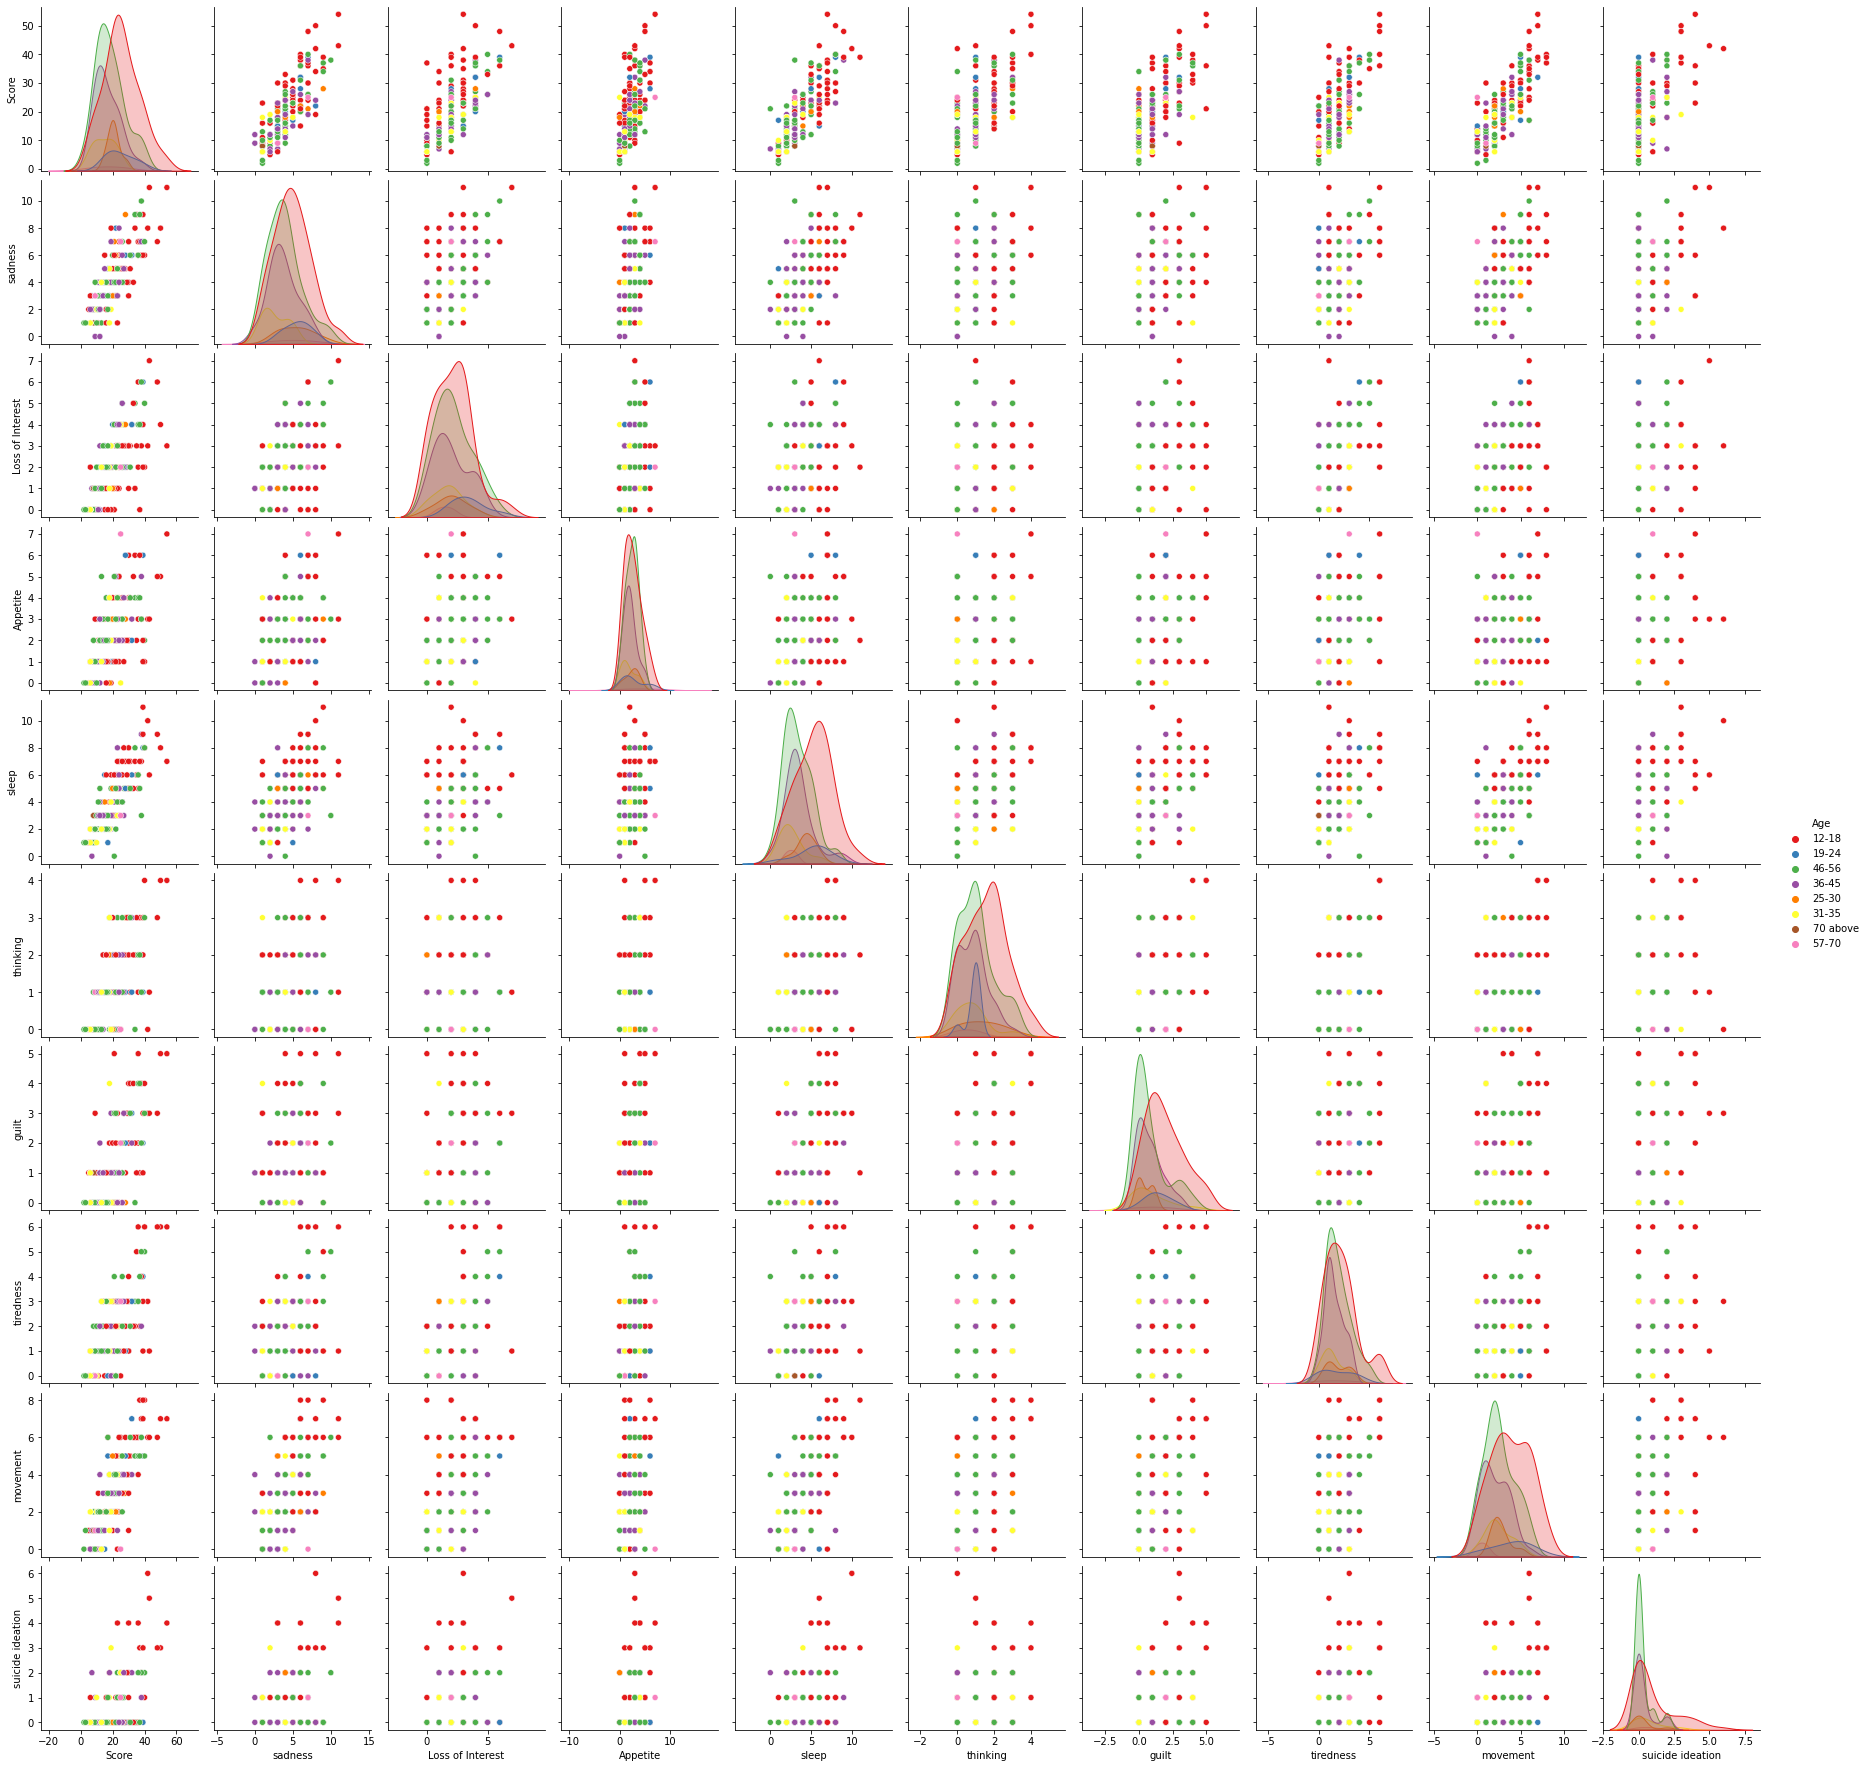

In [ ]:
sns.pairplot(copy1, hue="Age", palette="Set1")

In [ ]:
copy1.corr()

,Score,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
Score,1.000000,0.798919,0.679501,0.574162,0.789977,0.624554,0.678603,0.667332,0.791661,0.563354
sadness,0.798919,1.000000,0.502319,0.443479,0.565001,0.423683,0.408280,0.418188,0.602131,0.337726
Loss of Interest,0.679501,0.502319,1.000000,0.348043,0.450454,0.291757,0.347022,0.521802,0.458780,0.280746
Appetite,0.574162,0.443479,0.348043,1.000000,0.280519,0.281055,0.370963,0.326841,0.308522,0.236102
sleep,0.789977,0.565001,0.450454,0.280519,1.000000,0.485355,0.476041,0.440092,0.620636,0.406292
thinking,0.624554,0.423683,0.291757,0.281055,0.485355,1.000000,0.465605,0.444760,0.430837,0.287909
guilt,0.678603,0.408280,0.347022,0.370963,0.476041,0.465605,1.000000,0.365898,0.491112,0.465341
tiredness,0.667332,0.418188,0.521802,0.326841,0.440092,0.444760,0.365898,1.000000,0.429132,0.348606
movement,0.791661,0.602131,0.458780,0.308522,0.620636,0.430837,0.491112,0.429132,1.000000,0.377941
suicide ideation,0.563354,0.337726,0.280746,0.236102,0.406292,0.287909,0.465341,0.348606,0.377941,1.000000


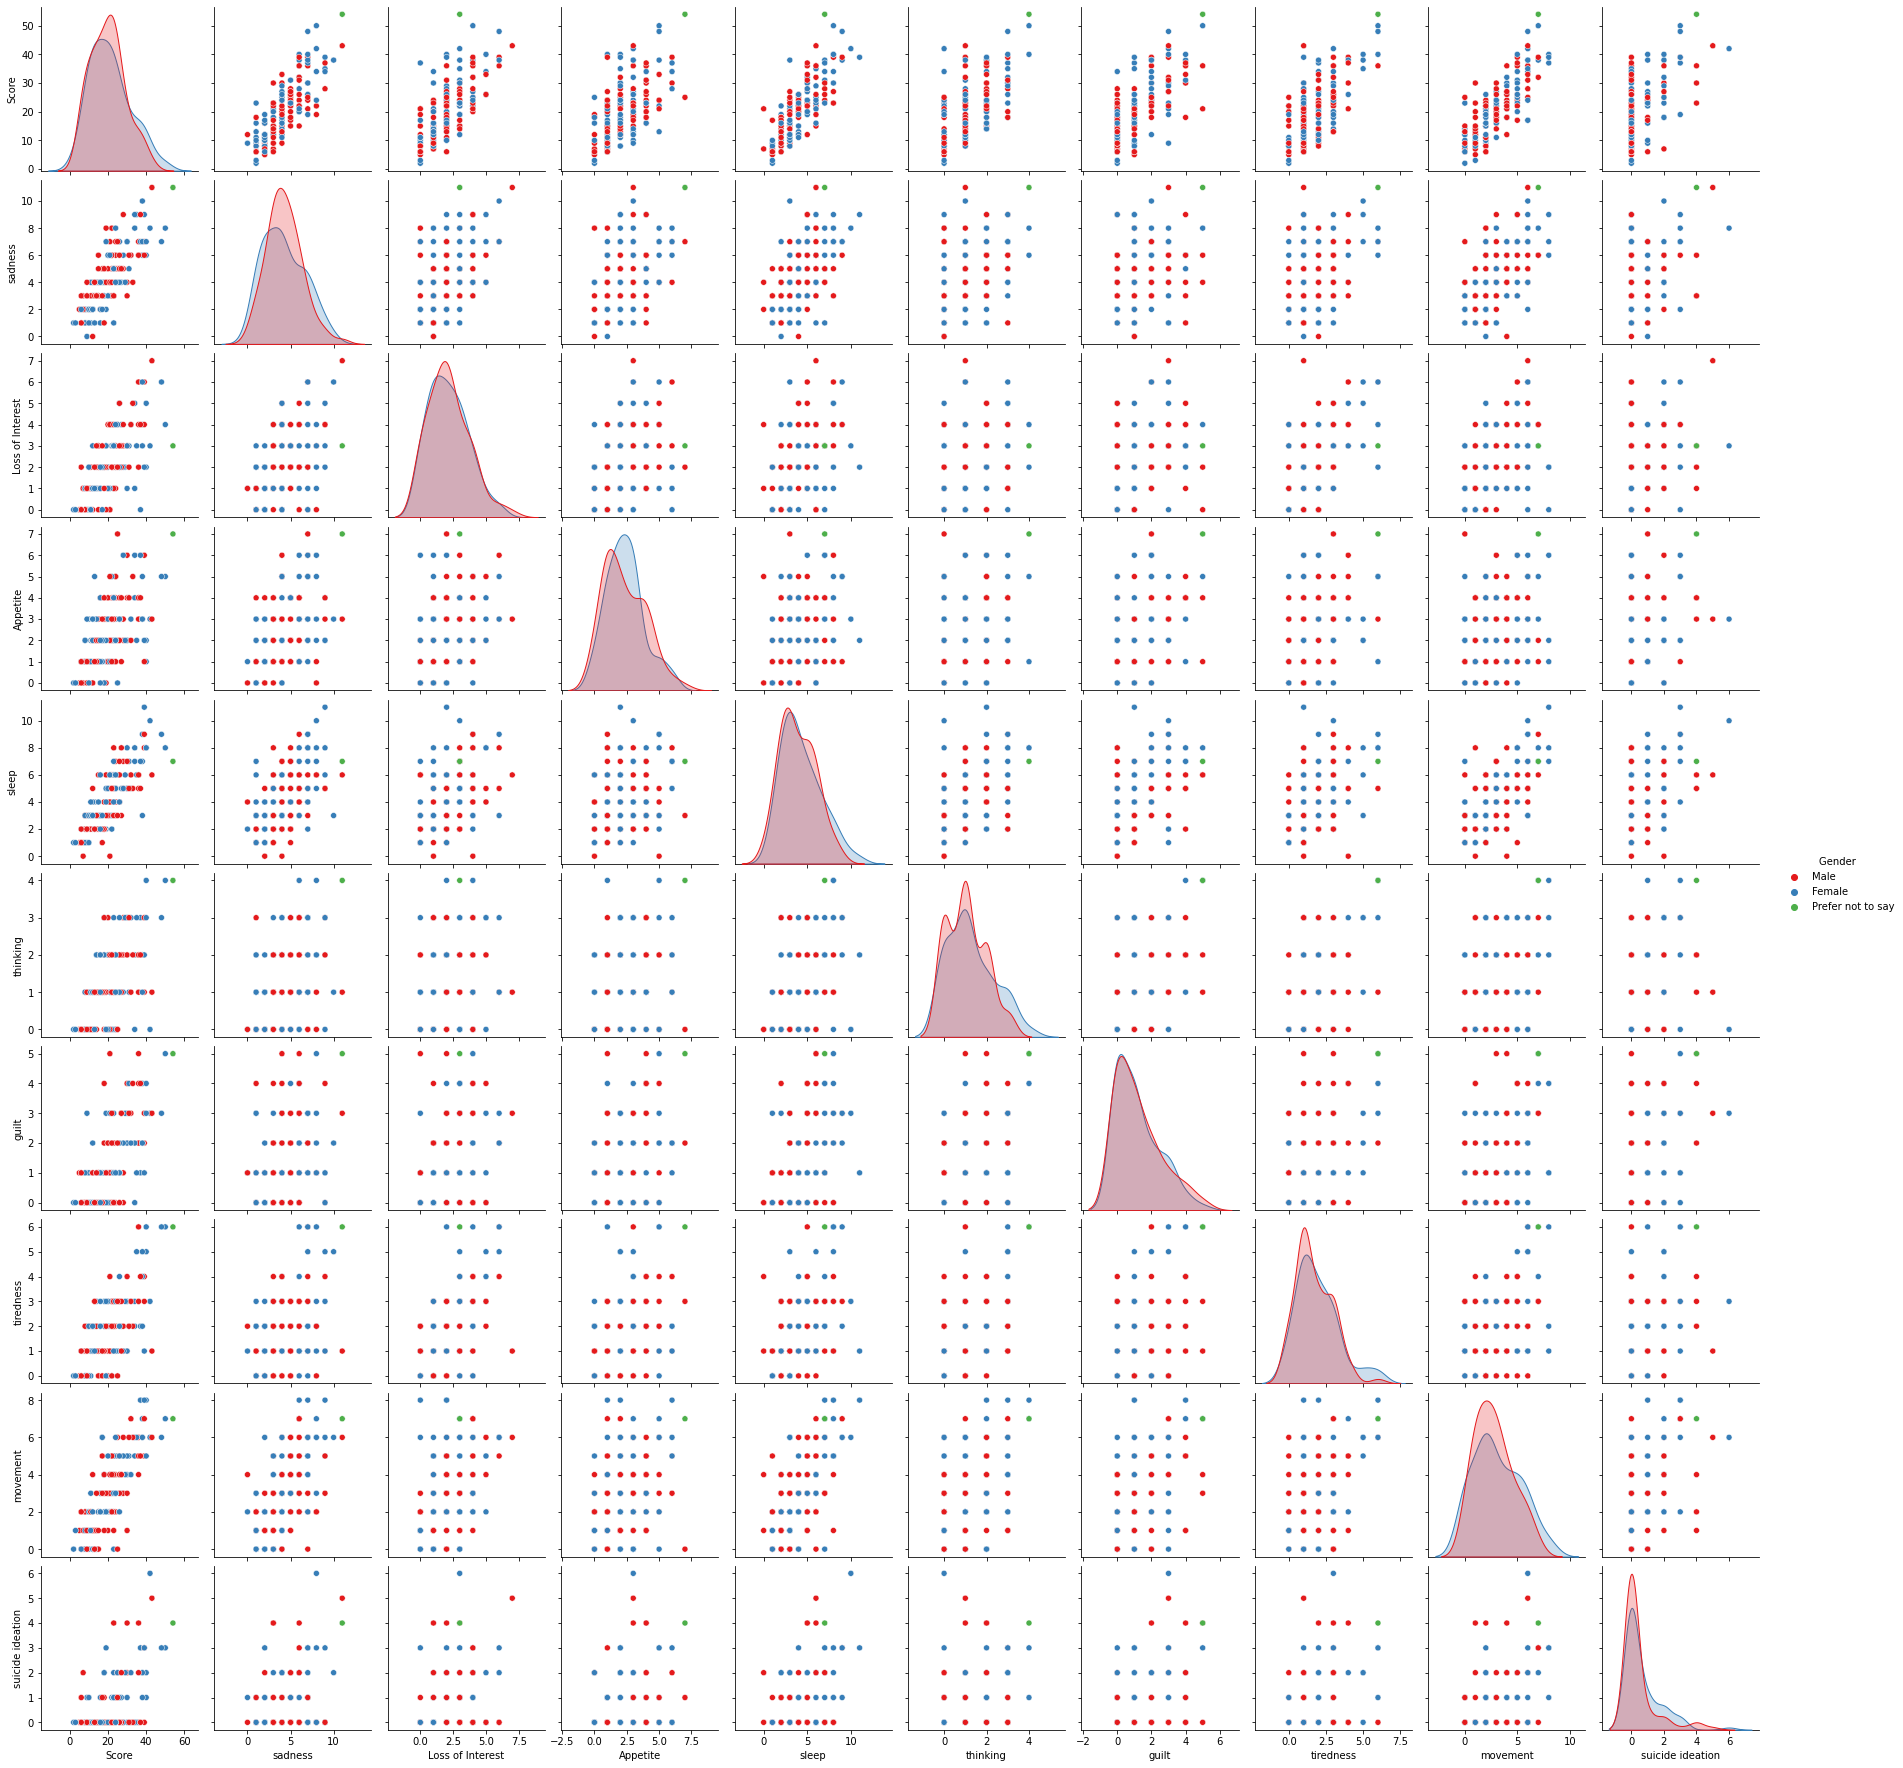

In [ ]:
sns.pairplot(copy2, hue="Gender ", palette="Set1")

In [ ]:
copy2.corr()

,Score,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
Score,1.000000,0.798919,0.679501,0.574162,0.789977,0.624554,0.678603,0.667332,0.791661,0.563354
sadness,0.798919,1.000000,0.502319,0.443479,0.565001,0.423683,0.408280,0.418188,0.602131,0.337726
Loss of Interest,0.679501,0.502319,1.000000,0.348043,0.450454,0.291757,0.347022,0.521802,0.458780,0.280746
Appetite,0.574162,0.443479,0.348043,1.000000,0.280519,0.281055,0.370963,0.326841,0.308522,0.236102
sleep,0.789977,0.565001,0.450454,0.280519,1.000000,0.485355,0.476041,0.440092,0.620636,0.406292
thinking,0.624554,0.423683,0.291757,0.281055,0.485355,1.000000,0.465605,0.444760,0.430837,0.287909
guilt,0.678603,0.408280,0.347022,0.370963,0.476041,0.465605,1.000000,0.365898,0.491112,0.465341
tiredness,0.667332,0.418188,0.521802,0.326841,0.440092,0.444760,0.365898,1.000000,0.429132,0.348606
movement,0.791661,0.602131,0.458780,0.308522,0.620636,0.430837,0.491112,0.429132,1.000000,0.377941
suicide ideation,0.563354,0.337726,0.280746,0.236102,0.406292,0.287909,0.465341,0.348606,0.377941,1.000000


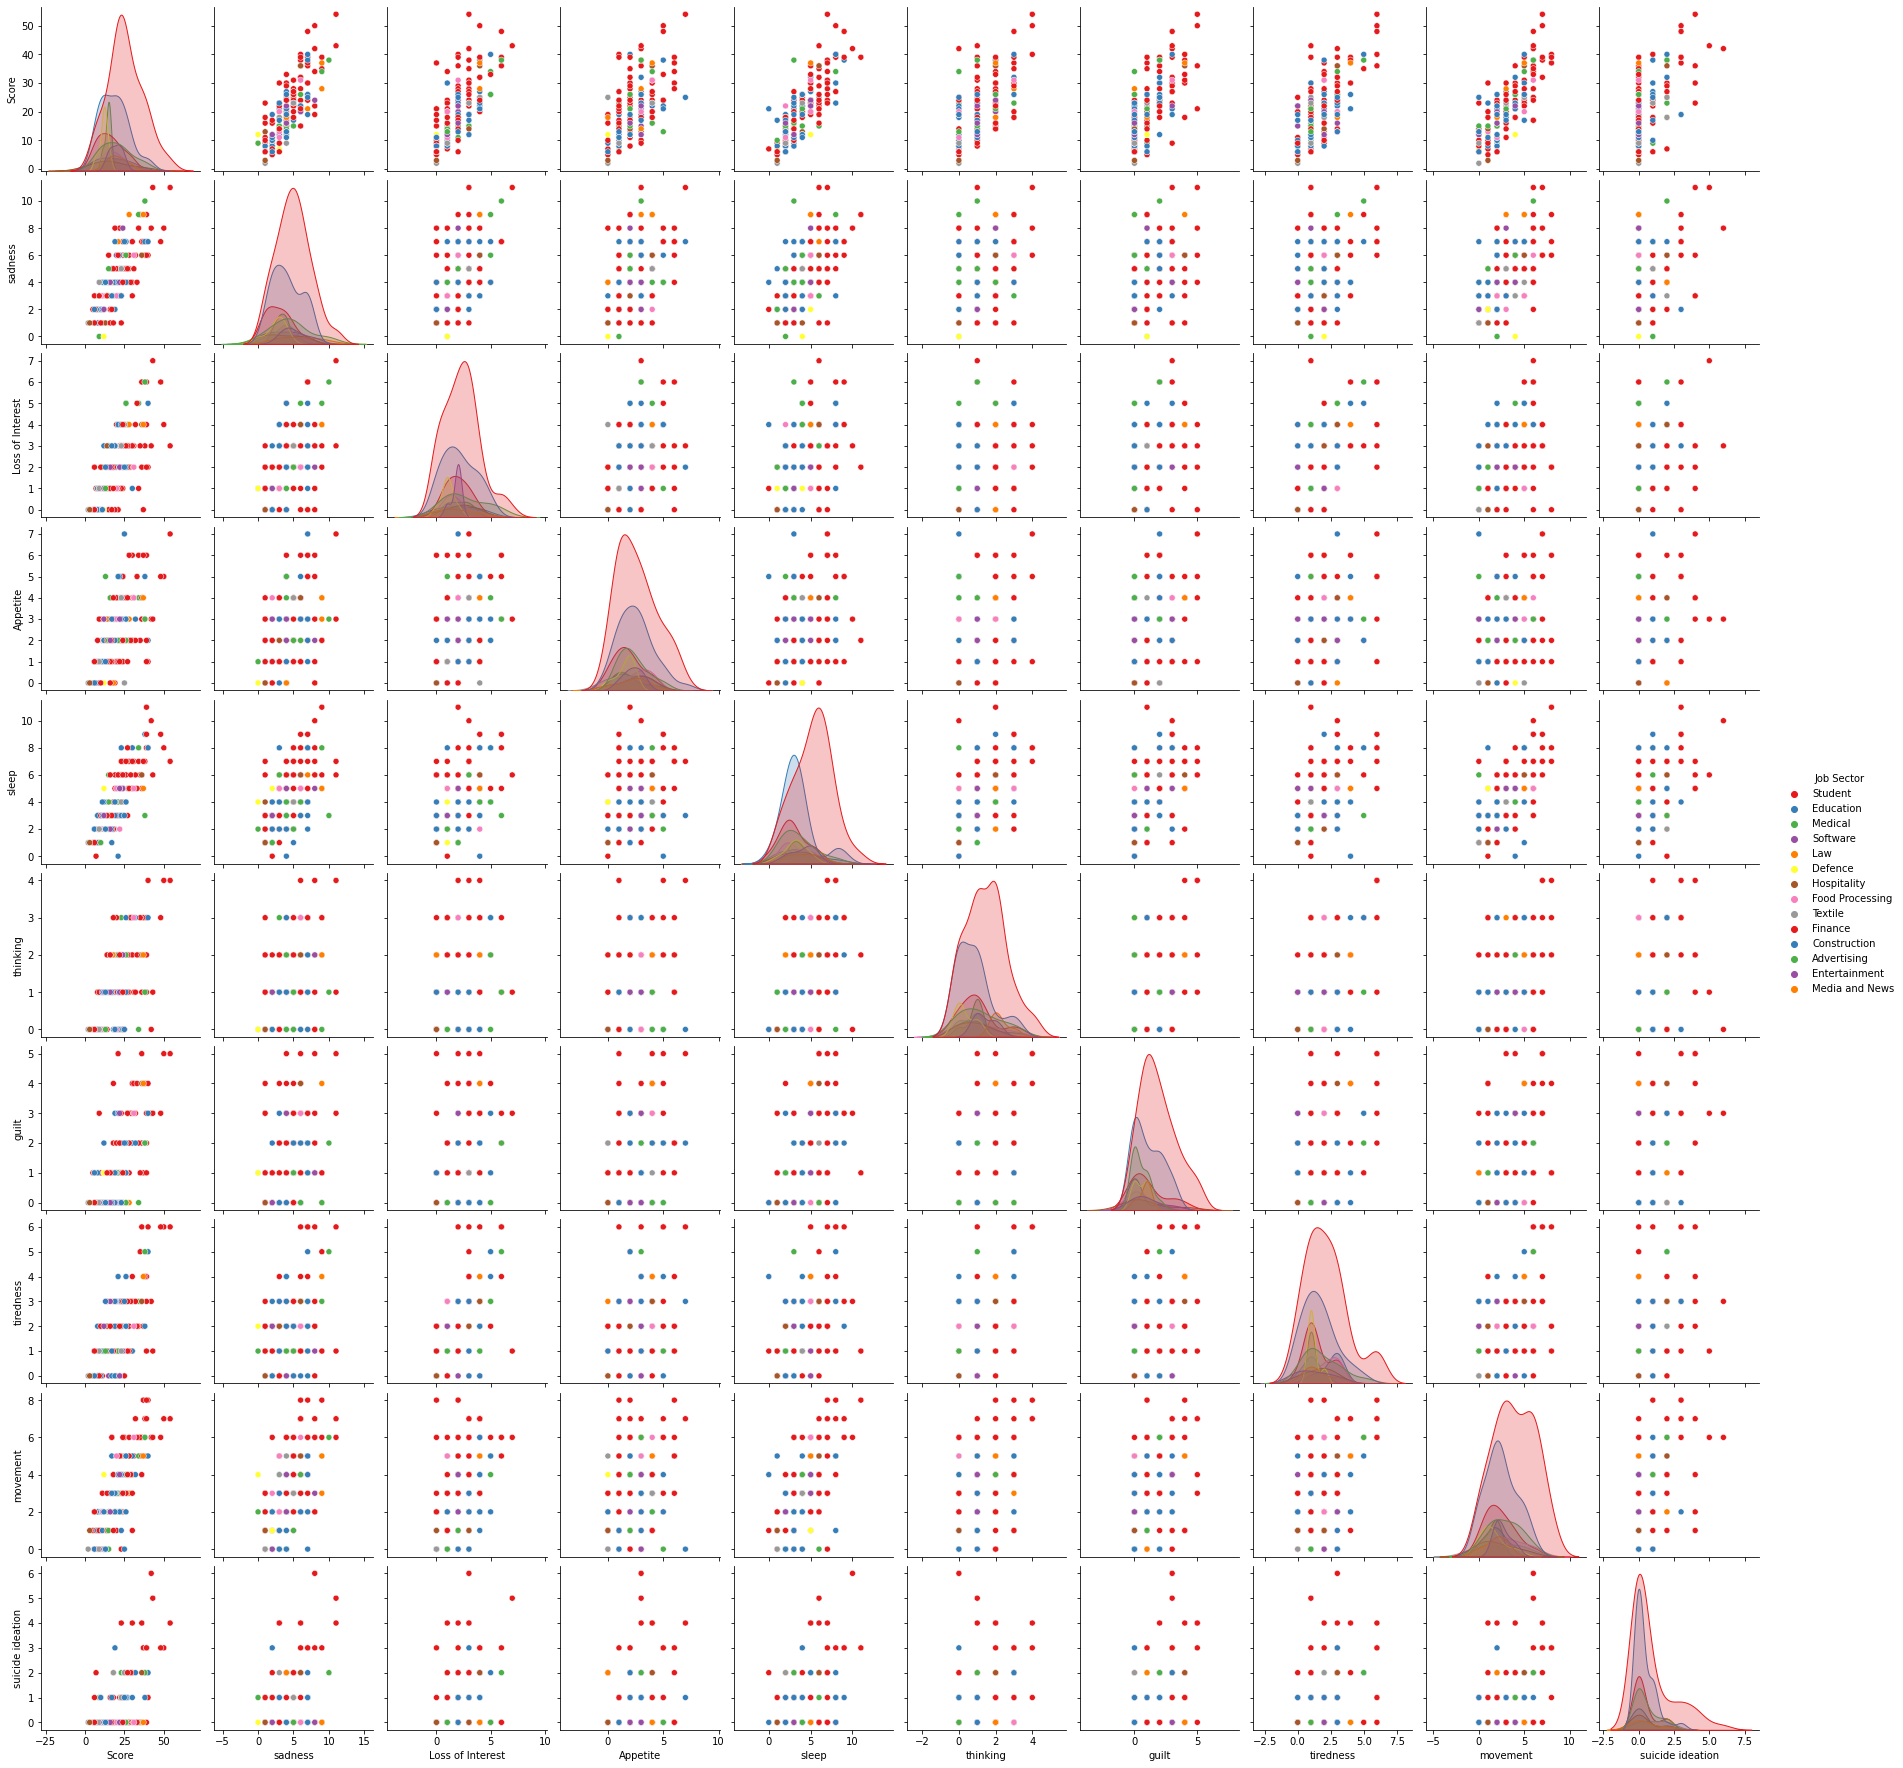

In [ ]:
sns.pairplot(copy3, hue="Job Sector", palette="Set1")

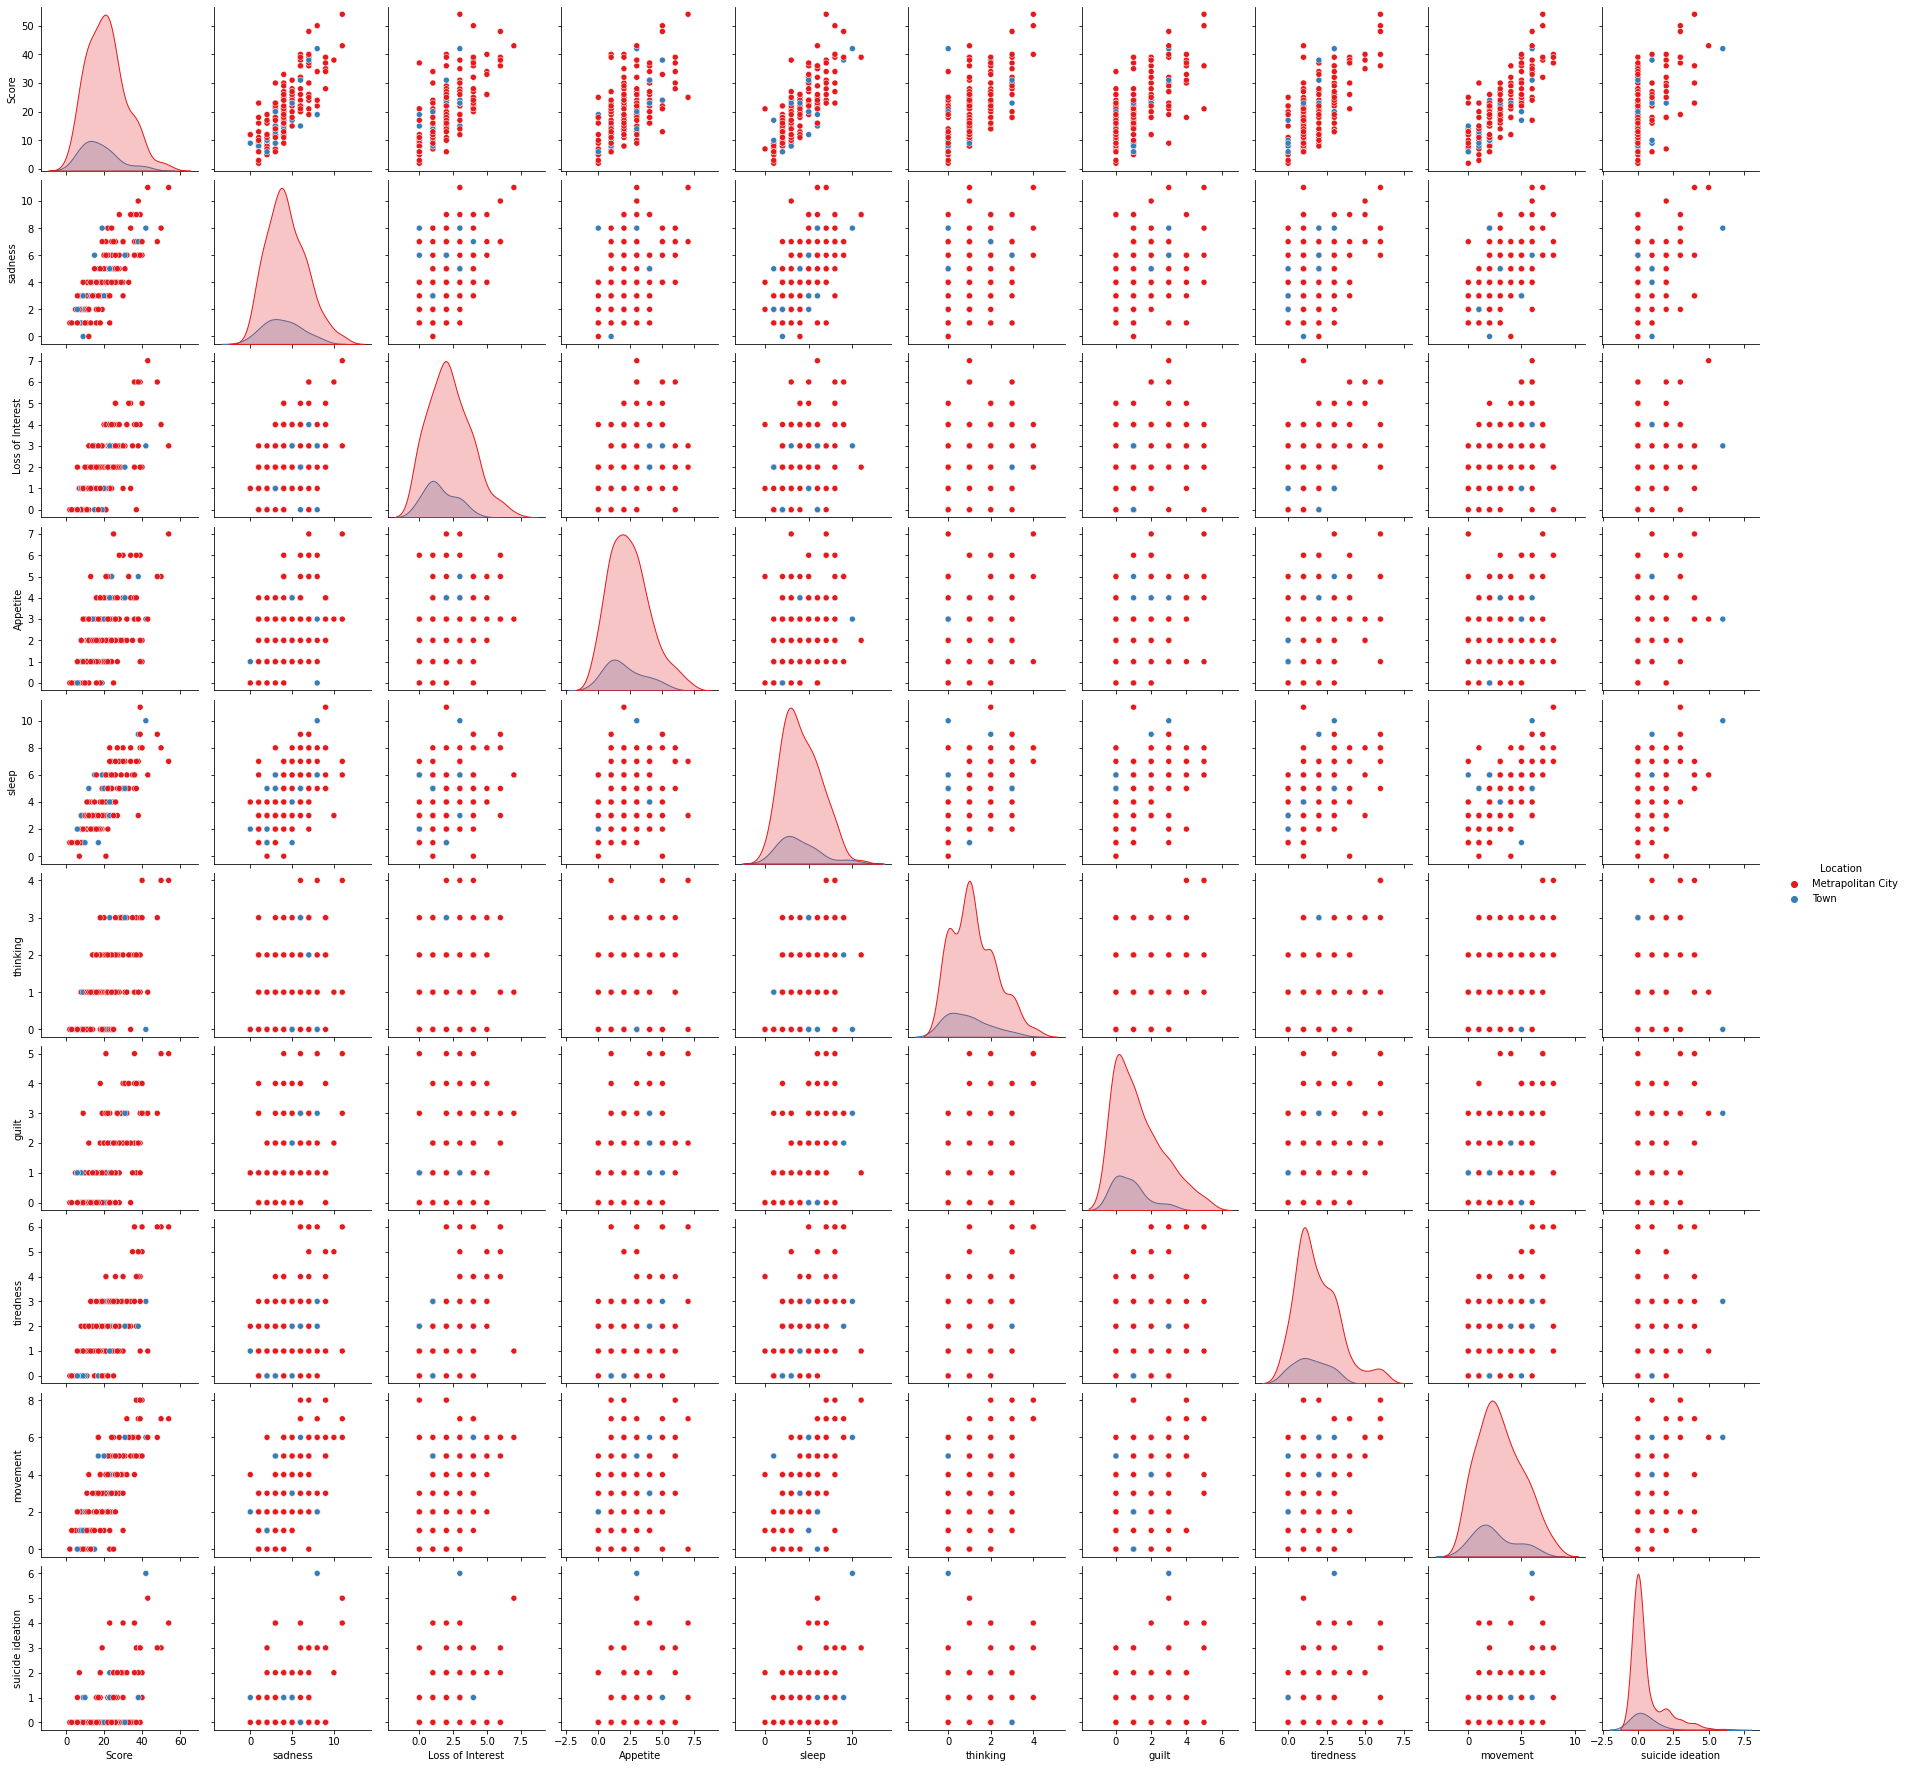

In [ ]:
sns.pairplot(copy4, hue="Location", palette="Set1")

In [ ]:
copy.columns

Index(['Email address', 'Name', 'Age', 'Gender ', 'Job Sector', 'Location',
       'Q1 - My appetite is poor', 'Q2- i cannot uplift my mood ',
       'Q3 - My self-confidence is low ',
       'Q4 - I have trouble concentrating on what I was doing',
       'Q5 - I feel sad', 'Q6 - My sleep is restless',
       'Q7 - I do not feel excited ', 'Q8 - Nothing makes me happy',
       'Q9 - I feel like a bad person',
       'Q10 - loss of interest in usual activities',
       'Q11 - I sleep much more than usual',
       'Q12 - I feel like I am moving too slowly  ', 'Q13 - I feel fidgety',
       'Q14 - I wish I was dead', 'Q15 - I want to hurt myself',
       'Q16 - I do not like myself',
       'Q17 - I loose a lot of weight without trying to',
       'Q18 - I have a lot of trouble getting to sleep',
       'Q19 - I could not focus on important things', 'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation'],

In [ ]:
rad=['sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation']

In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:

fig.add_trace(go.Scatterpolar(
    r=response.loc[(),rad].values.flatten(),
    theta=rad,
    fill='toself',
    name='Raheem Sterling'))
fig.add_trace(go.Scatterpolar(
    r=radar_shot.loc[(radar_shot["Player"] == "Sadio Mane"), rad].values.flatten(),
    theta=rad,
    fill='toself',
        name="Sadio Mane"))
# Additional properties for the plot:
fig.update_layout(
    title="Mane vs Sterling",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()


NameError: ignored

In [ ]:
fig = go.Figure()
for i in range(0,len(copy)):
  fig.add_trace(go.Scatterpolar(
      r=copy.loc[i,rad].values.flatten(),
    theta=rad,
    fill='toself',))
fig.update_layout(
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()



In [ ]:
mean=[[4.27,2.13, 2.36, 4.11, 1.16, 1.21, 1.83, 2.93, 0.56]]

In [ ]:
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(mean, columns=['sadness', 'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt', 'tiredness', 'movement', 'suicide ideation'])

In [ ]:
df

,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
0,4.27,2.13,2.36,4.11,1.16,1.21,1.83,2.93,0.56


In [ ]:
fig = go.Figure()
for i in range(0,len(df)):
  fig.add_trace(go.Scatterpolar(
      r=df.loc[i,rad].values.flatten(),
    theta=rad,
    fill='toself',))
fig.update_layout(
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()



# LOGISTIC REGRESSION- Score


In [ ]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
copy["Score"]=copy["Score"].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],["GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD","GOOD"])

copy["Score"]=copy["Score"].replace([26,27,28,29,30,31,32,33,34,35,36,37,38,39],["Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average","Above Average"])

copy["Score"]=copy["Score"].replace([40,41,42,43,44,45,46,47,48,49,50],["Average","Average","Average","Average","Average","Average","Average","Average","Average","Average","Average"])

copy["Score"]=copy["Score"].replace([51,52,53,54,55,56,57,58,59],["Below Average","Below Average","Below Average","Below Average","Below Average","Below Average","Below Average","Below Average","Below Average",])

copy["Score"]=copy["Score"].replace([60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76],["BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD","BAD"])

In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

ce_model= ce.OneHotEncoder(cols=['Gender ', 'Age','Location','Job Sector'])

In [ ]:
new = ce_model.fit_transform(copy)

In [ ]:
new.head()

,Email address,Name,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,...,Score,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
0,aaravgandhi7@gmail.com,Aarav gandhi,1,0,0,0,0,0,0,0,...,GOOD,4,2,0,4,2,2,1,3,0
1,madhavdacha@gmail.com,Madhav Dacha,1,0,0,0,0,0,0,0,...,Above Average,6,2,4,6,2,5,3,4,4
2,pranayjain.official@gmail.com,Pranay Jain,1,0,0,0,0,0,0,0,...,GOOD,6,2,4,5,1,0,2,4,0
3,shivaanshsahni2001@gmail.com,Shivaansh Sahni,0,1,0,0,0,0,0,0,...,GOOD,8,3,1,6,1,1,0,2,0
4,inneshm@gmail.com,Innesh Mahajan,1,0,0,0,0,0,0,0,...,GOOD,6,0,1,3,2,0,1,2,0


In [ ]:
new_linear=new

In [ ]:
'''copy["Age"] = copy["Age"].replace(["12-18","19-24","25-30","31-35","36-45","46-56","57-70","70 above"] , [1,2,3,4,5,6,7,8])
copy["Gender "] = copy["Gender "].replace(["Male", "Female", "Prefer not to say"] , [1,2,3])
copy["Job Sector"] = copy["Job Sector"].replace(["Medical", "Finance", "Entertainment", "Software", "Education", "Textile", "Media and News", "Food Processing", "Hospitality", "Construction", "Law", "Advertising", "Student", "Defence"] , [1,2,3,4,5,6,7,8,9,10,11,12,13,14])
copy["Location"] = copy["Location"].replace(["Metrapolitan City", "Town", "Rural Area"] , [1,2,3])'''

'copy["Age"] = copy["Age"].replace(["12-18","19-24","25-30","31-35","36-45","46-56","57-70","70 above"] , [1,2,3,4,5,6,7,8])\ncopy["Gender "] = copy["Gender "].replace(["Male", "Female", "Prefer not to say"] , [1,2,3])\ncopy["Job Sector"] = copy["Job Sector"].replace(["Medical", "Finance", "Entertainment", "Software", "Education", "Textile", "Media and News", "Food Processing", "Hospitality", "Construction", "Law", "Advertising", "Student", "Defence"] , [1,2,3,4,5,6,7,8,9,10,11,12,13,14])\ncopy["Location"] = copy["Location"].replace(["Metrapolitan City", "Town", "Rural Area"] , [1,2,3])'

In [ ]:
new

,Email address,Name,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,...,Score,sadness,Loss of Interest,Appetite,sleep,thinking,guilt,tiredness,movement,suicide ideation
0,aaravgandhi7@gmail.com,Aarav gandhi,1,0,0,0,0,0,0,0,...,GOOD,4,2,0,4,2,2,1,3,0
1,madhavdacha@gmail.com,Madhav Dacha,1,0,0,0,0,0,0,0,...,Above Average,6,2,4,6,2,5,3,4,4
2,pranayjain.official@gmail.com,Pranay Jain,1,0,0,0,0,0,0,0,...,GOOD,6,2,4,5,1,0,2,4,0
3,shivaanshsahni2001@gmail.com,Shivaansh Sahni,0,1,0,0,0,0,0,0,...,GOOD,8,3,1,6,1,1,0,2,0
4,inneshm@gmail.com,Innesh Mahajan,1,0,0,0,0,0,0,0,...,GOOD,6,0,1,3,2,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,arjuunkuumar@gmail.com,Arjun,0,0,1,0,0,0,0,0,...,Above Average,6,4,4,6,2,4,3,5,2
157,ajay.mathurr24@gmail.com,AJ,0,0,1,0,0,0,0,0,...,Above Average,9,4,4,5,2,4,4,5,0
158,samiyabhatia2695@gmail.com,Samiya,1,0,0,0,0,0,0,0,...,Average,7,6,5,9,3,3,6,6,3
159,kushk2020@gmail.com,Kush Khatri,0,0,0,0,0,0,0,1,...,GOOD,7,2,7,3,0,2,3,0,1


In [ ]:
new.columns

Index(['Email address', 'Name', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
       'Age_6', 'Age_7', 'Age_8', 'Gender _1', 'Gender _2', 'Gender _3',
       'Job Sector_1', 'Job Sector_2', 'Job Sector_3', 'Job Sector_4',
       'Job Sector_5', 'Job Sector_6', 'Job Sector_7', 'Job Sector_8',
       'Job Sector_9', 'Job Sector_10', 'Job Sector_11', 'Job Sector_12',
       'Job Sector_13', 'Job Sector_14', 'Location_1', 'Location_2',
       'Q1 - My appetite is poor', 'Q2- i cannot uplift my mood ',
       'Q3 - My self-confidence is low ',
       'Q4 - I have trouble concentrating on what I was doing',
       'Q5 - I feel sad', 'Q6 - My sleep is restless',
       'Q7 - I do not feel excited ', 'Q8 - Nothing makes me happy',
       'Q9 - I feel like a bad person',
       'Q10 - loss of interest in usual activities',
       'Q11 - I sleep much more than usual',
       'Q12 - I feel like I am moving too slowly  ', 'Q13 - I feel fidgety',
       'Q14 - I wish I was dead', 'Q15 - I want to hu

In [ ]:
X = new.drop(['Email address', 'Name', 'Q1 - My appetite is poor','Q2- i cannot uplift my mood ',
       'Q3 - My self-confidence is low ',
       'Q4 - I have trouble concentrating on what I was doing',
       'Q5 - I feel sad', 'Q6 - My sleep is restless',
       'Q7 - I do not feel excited ', 'Q8 - Nothing makes me happy',
       'Q9 - I feel like a bad person',
       'Q10 - loss of interest in usual activities',
       'Q11 - I sleep much more than usual',
       'Q12 - I feel like I am moving too slowly  ', 'Q13 - I feel fidgety',
       'Q14 - I wish I was dead', 'Q15 - I want to hurt myself',
       'Q16 - I do not like myself',
       'Q17 - I loose a lot of weight without trying to',
       'Q18 - I have a lot of trouble getting to sleep',
       'Q19 - I could not focus on important things', 'Score', 'sadness',
       'Loss of Interest', 'Appetite', 'sleep', 'thinking', 'guilt',
       'tiredness', 'movement', 'suicide ideation'], axis=1)
y = response['Score']


#

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Load Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
#
import warnings
warnings.filterwarnings("ignore")
#
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [ ]:
X_train

array([[-0.52633357, -0.12700013, -0.44294755, ..., -0.96362411,
        -0.31438386,  1.15470054],
       [-0.52633357, -0.12700013, -0.44294755, ..., -0.96362411,
         3.1808249 , -0.8660254 ],
       [-0.52633357, -0.12700013, -0.44294755, ..., -0.96362411,
        -0.31438386,  1.15470054],
       ...,
       [-0.52633357, -0.12700013,  2.25760364, ...,  1.03774904,
        -0.31438386, -0.8660254 ],
       [ 1.89993581, -0.12700013, -0.44294755, ...,  1.03774904,
        -0.31438386, -0.8660254 ],
       [-0.52633357, -0.12700013,  2.25760364, ...,  1.03774904,
        -0.31438386, -0.8660254 ]])

In [ ]:
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6530612244897959


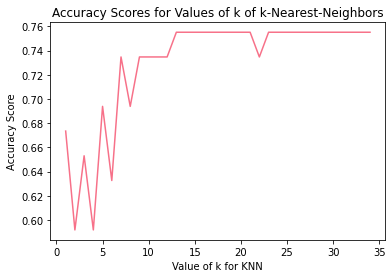

In [ ]:
k_range = list(range(1,35))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
knn_acc = metrics.accuracy_score(y_test, y_pred)
knn_cm = confusion_matrix(y_test,y_pred)

In [ ]:
knn_acc

0.7551020408163265

In [ ]:
knn_cm

array([[ 0,  0, 10],
       [ 0,  0,  2],
       [ 0,  0, 37]])

In [ ]:
n_neighbors = [5,7,9,11,13,15,17,19,21]
weights = ["uniform","distance"]
metric = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [ ]:
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.7340909090909091
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=11, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[ 0  0 10]
 [ 0  0  2]
 [ 1  0 36]]
0.7346938775510204


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)


SGDClassifier()

In [ ]:
#Measure accuracy on the testing set
y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.6122448979591837


# 12-18


In [ ]:
from google.colab import files
uploaded=files.upload()